In [1]:
from parzen_estimator import (
    CategoricalParzenEstimator,
    MultiVariateParzenEstimator,
    NumericalParzenEstimator,
)
import matplotlib.pyplot as plt
import numpy as np

## Kernel density estimation for continuous parameter

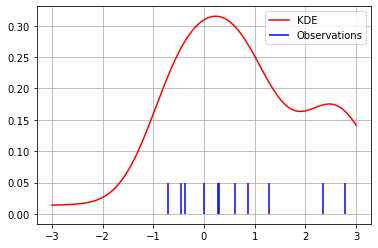

In [2]:
lb, ub = -3, 3
rng = np.random.RandomState(0)
samples = rng.random(10) * (ub - lb) + lb

pe = NumericalParzenEstimator(samples, lb=lb, ub=ub)

x = np.linspace(-3, 3, 100)

plt.plot(x, pe.pdf(x), color="red", label="KDE")
plt.vlines(pe._means, 0, 0.05, label="Observations", color="blue")
plt.grid()
plt.legend()
plt.show()

## Kernel density estimation for discrete parameter

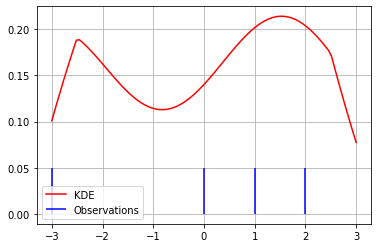

In [3]:
lb, ub = -3, 3
rng = np.random.RandomState(0)
samples = rng.randint(6, size=3) + lb

pe = NumericalParzenEstimator(samples, lb=lb, ub=ub, q=1)

x = np.linspace(-3, 3, 100)

plt.plot(x, pe.pdf(x), color="red", label="KDE")
plt.vlines(pe._means, 0, 0.05, label="Observations", color="blue")
plt.grid()
plt.legend()
plt.show()

## Kernel density estimation for categorical parameter

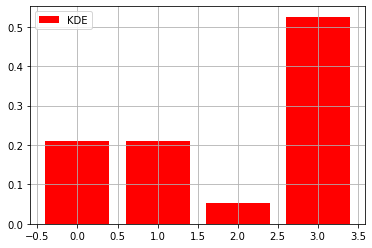

In [4]:
n_choices = 4
rng = np.random.RandomState(0)
samples = rng.randint(n_choices, size=10)

pe = CategoricalParzenEstimator(samples, n_choices=n_choices, top=0.9)
x = np.arange(n_choices)

plt.bar(x, pe.pdf(x), color="red", label="KDE")
plt.grid()
plt.legend()
plt.show()

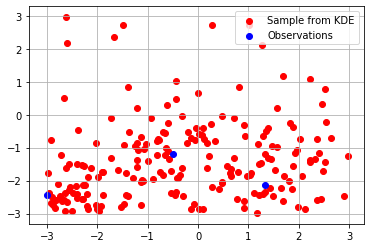

In [5]:
pes = {}
lb, ub = -3, 3
n_observations = 3
rng = np.random.RandomState(1)
sample_set = [
    rng.random(n_observations) * (ub - lb) + lb,
    rng.random(n_observations) * (ub - lb) + lb
]
pes["n1"] = NumericalParzenEstimator(sample_set[0], lb=lb, ub=ub)
pes["n2"] = NumericalParzenEstimator(sample_set[1], lb=lb, ub=ub)

mvpe = MultiVariateParzenEstimator(pes)
x = mvpe.sample(n_samples=200, rng=rng)
plt.scatter(x[0], x[1], color="red", label="Sample from KDE")
plt.scatter(sample_set[0], sample_set[1], color="blue", label="Observations")
plt.legend()
plt.grid()
plt.show()